# Part N - Linear Regression

Let's get our feet wet with a very basic Machine Learning algorithm: Linear Regression.  
Everyone remembers the equation of a line:  
$$
y = mX + b
$$ 

For our first example, we will use the most highly correlated variable `sqft` as our independent variable (`X`).  
Using known values of `y`, we will iteratively generate a "best fit" line using least squares.  
We should then be able to get a (rough) `price` prediction for a new, unseen `sqft`.  
This is called *Univariate* Linear Regression since we are using only *one* independent variable. In a later example we will cover *Multivariate* Linear Regression so we can utilize many independent variables to produce a more accurate output.

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Let's load the data and remind ourselves of the contents

In [2]:
df = pd.read_csv('./data/round3/rew_round3_with_latlng.csv')
df.head()

,address,price,link,bed,bath,sqft,age,gross_taxes_2017,strata_maintenance_fees,area,sub_area,property_type,strata_type,listing_id,primary_broker,features,amenities,school_info,latlng
0,405-12 Athletes Way,999000,https://www.rew.ca/properties/R2219336/405-12-...,2,1,884,8.0,2153.0,516.0,Vancouver West,False Creek,Apt/Condo,Freehold Strata,R2219336,Team 3000 Realty Ltd.,"Air Conditioning, ClthWsh/Dryr/Frdg/Stve/DW, M...","Club House, Elevator, Exercise Centre, Garden,...","[{'name': 'Simon Fraser Elementary School', 'a...","(49.271554, -123.106738)"
1,604-1661 Ontario Street,1398000,https://www.rew.ca/properties/R2221859/604-166...,2,2,1189,9.0,2721.0,679.0,Vancouver West,False Creek,Apt/Condo,Freehold Strata,R2221859,Trg The Residential Group Rlty,"ClthWsh/Dryr/Frdg/Stve/DW, Microwave","Bike Room, Exercise Centre, In Suite Laundry, ...","[{'name': 'Simon Fraser Elementary School', 'a...",MISSING
2,204-1529 W 6th Avenue,699000,https://www.rew.ca/properties/R2220891/204-152...,0,1,719,21.0,1456.0,361.0,Vancouver West,False Creek,Apt/Condo,Freehold Strata,R2220891,Macdonald Realty,"Dishwasher, Garage Door Opener","Elevator, Restaurant, Storage, Wheelchair Access","[{'name': 'Henry Hudson Elementary School', 'a...",MISSING
3,106-1551 Mariner Walk,929000,https://www.rew.ca/properties/R2222093/106-155...,2,2,1094,29.0,1983.0,493.0,Vancouver West,False Creek,Apt/Condo,Leasehold prepaid-Strata,R2222093,Engel & Volkers Vancouver,"ClthWsh/Dryr/Frdg/Stve/DW, Disposal - Waste, D...","Elevator, Garden, In Suite Laundry, Storage","[{'name': 'Henry Hudson Elementary School', 'a...",MISSING
4,1103-1783 Manitoba Street,859000,https://www.rew.ca/properties/R2222252/1103-17...,2,1,714,3.0,2018.0,361.0,Vancouver West,False Creek,Apt/Condo,Freehold Strata,R2222252,Sutton Grp West Coast (Brdwy),"ClthWsh/Dryr/Frdg/Stve/DW, Disposal - Waste, D...","Bike Room, Club House, Elevator, Exercise Cent...","[{'name': 'Simon Fraser Elementary School', 'a...",MISSING


Recall our line equation: 
$$
y = mX + b
$$ 

We set the 'price' column as the dependent variable `y` and the 'sqft' column as the independent variable `X`

In [3]:
df = df[df['sqft'] != 0]
X = df['sqft']
y = df['price']

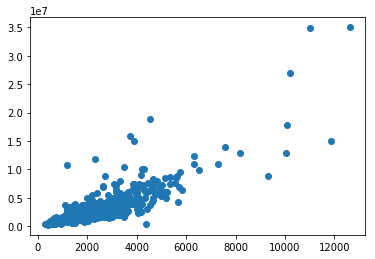

In [4]:
plt.scatter(X,y)

We observe a linear relationship between `X` and `y` and we could probably even predict a best fitting line using our eyes

In [5]:
regressor = LinearRegression(normalize=True)
model = regressor.fit(X.values[:,np.newaxis],y.values[:,np.newaxis])

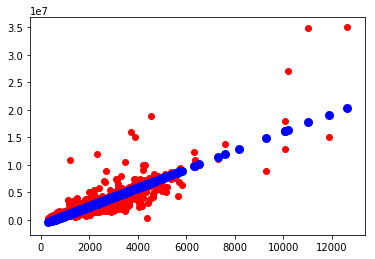

In [6]:
y_pred = model.predict(X.values[:,np.newaxis])
plt.scatter(X,y,color='red')
plt.scatter(X, y_pred, color='blue', linewidth=3)

In [7]:
new_sqft = 980
predicted_price = model.predict(np.array([[new_sqft]]))
print("Predicted price is ${}M".format(predicted_price[0][0]/1e6))

Predicted price is $0.7438299052336587M


## Multivariate Linear Regression

In [8]:
X_multi = df[['sqft', 'bed', 'bath']]

In [9]:
regressor_multi = LinearRegression(normalize=True)
model_multi = regressor_multi.fit(X_multi.values,y.values[:,np.newaxis])

In [10]:
new_sqft = 980
new_bed = 2
new_bath = 2
predicted_price = model_multi.predict(np.array([[new_sqft, new_bed, new_bath]]))
print("Predicted price is ${}M".format(predicted_price[0][0]/1e6))

Predicted price is $0.9902690908123862M


## Our model is not working! Perhaps due to absense of normalization

In [11]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(X)
# X_scaled = scaler.transform(X)

In [12]:
# regressor_multi_scaled = LinearRegression(normalize=True)
# model_multi_scaled = regressor_multi_scaled.fit(X_scaled,y.values[:,np.newaxis])

In [13]:
# new_sqft = 3200
# new_bed = 3
# new_bath = 3
# X_new = np.array([[new_sqft, new_bed, new_bath]])
# predicted_price = model_multi_scaled.predict(scaler.transform(X_new))
# print("Predicted price is ${}M".format(predicted_price[0][0]/1e6))

## We can see that the multivariate may perform marginally better. But we need more context for the regressor to perform optimally!
Right now we are not using some of the important categorical features such as Area and SubArea

In [14]:
df.sub_area.unique()

array(['False Creek', 'Downtown West', 'Yaletown', 'South Vancouver',
       'Southlands', 'West End', 'Victoria East', 'Southwest Marine',
       'South Granville', 'University (UBC)', 'Dunbar', 'Coal Harbour',
       'Fairview', 'Collingwood', 'Champlain Heights', 'Downtown East',
       'Killarney', 'Fraser East', 'Hastings', 'Hastings East',
       'Kerrisdale', 'Fraserview East', 'Grandview East',
       'Mount Pleasant East', 'Knight', 'Renfrew Heights', 'South Cambie',
       'Quilchena', 'Oakridge', 'Marpole', 'MacKenzie Heights', 'Arbutus',
       'Cambie', 'Main', 'Kitsilano', 'Renfrew', 'Point Grey',
       'Mount Pleasant West', 'Shaughnessy'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 720
Data columns (total 19 columns):
address                    712 non-null object
price                      712 non-null int64
link                       712 non-null object
bed                        712 non-null int64
bath                       712 non-null int64
sqft                       712 non-null int64
age                        712 non-null float64
gross_taxes_2017           638 non-null float64
strata_maintenance_fees    346 non-null float64
area                       712 non-null object
sub_area                   712 non-null object
property_type              712 non-null object
strata_type                712 non-null object
listing_id                 712 non-null object
primary_broker             712 non-null object
features                   712 non-null object
amenities                  712 non-null object
school_info                712 non-null object
latlng                     712 non-null object
dty

In [70]:
X_w_cat = pd.get_dummies(df[['bed', 'bath', 'sqft', 'sub_area', 'area']])
# X_w_cat = pd.get_dummies(df[['bed', 'bath', 'sqft', 'area', 'sub_area', 'property_type', 'strata_type']])


In [71]:
X_w_cat.columns

Index(['bed', 'bath', 'sqft', 'sub_area_Arbutus', 'sub_area_Cambie',
       'sub_area_Champlain Heights', 'sub_area_Coal Harbour',
       'sub_area_Collingwood', 'sub_area_Downtown East',
       'sub_area_Downtown West', 'sub_area_Dunbar', 'sub_area_Fairview',
       'sub_area_False Creek', 'sub_area_Fraser East',
       'sub_area_Fraserview East', 'sub_area_Grandview East',
       'sub_area_Hastings', 'sub_area_Hastings East', 'sub_area_Kerrisdale',
       'sub_area_Killarney', 'sub_area_Kitsilano', 'sub_area_Knight',
       'sub_area_MacKenzie Heights', 'sub_area_Main', 'sub_area_Marpole',
       'sub_area_Mount Pleasant East', 'sub_area_Mount Pleasant West',
       'sub_area_Oakridge', 'sub_area_Point Grey', 'sub_area_Quilchena',
       'sub_area_Renfrew', 'sub_area_Renfrew Heights', 'sub_area_Shaughnessy',
       'sub_area_South Cambie', 'sub_area_South Granville',
       'sub_area_South Vancouver', 'sub_area_Southlands',
       'sub_area_Southwest Marine', 'sub_area_University (UB

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBRegressor
from sklearn.neural_network import MLPRegressor
def train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression(normalize=True)
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, mean_squared_error(y_test, y_pred)
def train_test_xgb(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = XGBRegressor()
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, mean_squared_error(y_test, y_pred)
def train_test_nn(X, y):
    from sklearn.preprocessing import StandardScaler
#     scaler = StandardScaler().fit(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = MLPRegressor(max_iter=20000,
                             hidden_layer_sizes=(100,), 
                             activation='relu',
                             solver='lbfgs',)
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, mean_squared_error(y_test, y_pred)
model1a, mse1a = train_test(X.values[:,np.newaxis],y)
print(np.sqrt(mse1a))
model1b, mse1b = train_test(X_multi.values,y)
print(np.sqrt(mse1b))
model1c, mse1c = train_test(X_w_cat.values,y)
print(np.sqrt(mse1c))
model2a, mse2a = train_test_nn(X.values[:,np.newaxis],y)
print(np.sqrt(mse2a))
model2b, mse2b = train_test_nn(X_multi.values,y)
print(np.sqrt(mse2b))
model2c, mse2c = train_test_nn(X_w_cat.values,y)
print(np.sqrt(mse2c))

1881566.7136975639
1656605.5274023735
1692511.0319431415
1854612.8200525849
1653386.97895603
1557677.913253941


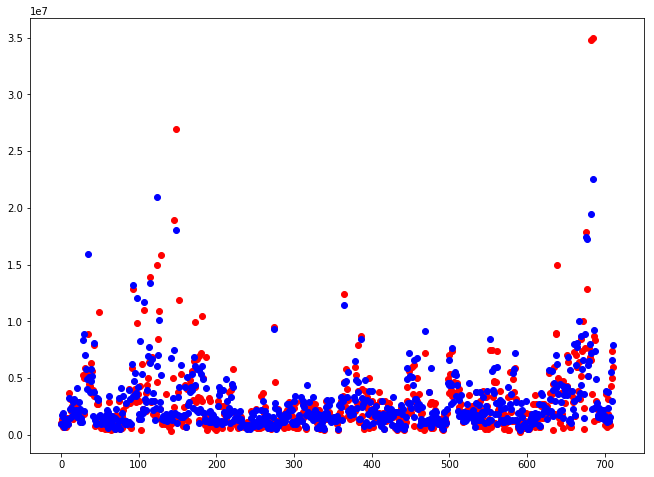

In [107]:
y_pred = model2c.predict(X_w_cat.values)
plt.figure(figsize=(11,8))
plt.scatter(range(len(X)),y,color='red', linewidth=1)
plt.scatter(range(len(X)), y_pred, color='blue', linewidth=1)

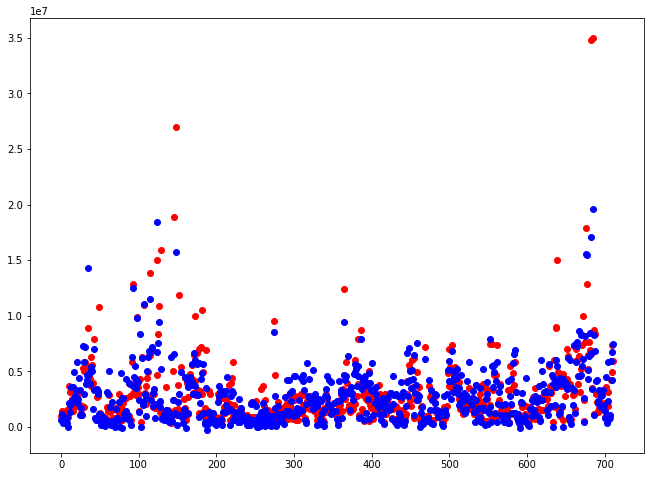

In [108]:
y_pred = model1a.predict(X.values[:,np.newaxis])
plt.figure(figsize=(11,8))
plt.scatter(range(len(X)),y,color='red', linewidth=1)
plt.scatter(range(len(X)), y_pred, color='blue', linewidth=1)

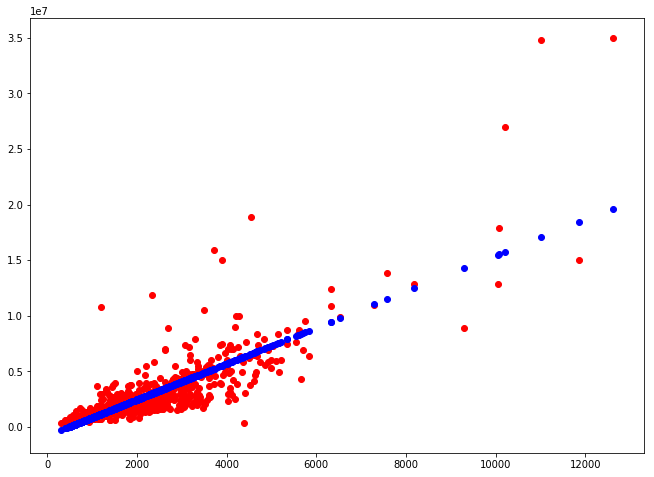

In [99]:
y_pred = model1a.predict(X.values[:,np.newaxis])
plt.figure(figsize=(11,8))
plt.scatter(X,y,color='red', linewidth=1)
plt.scatter(X, y_pred, color='blue', linewidth=1)

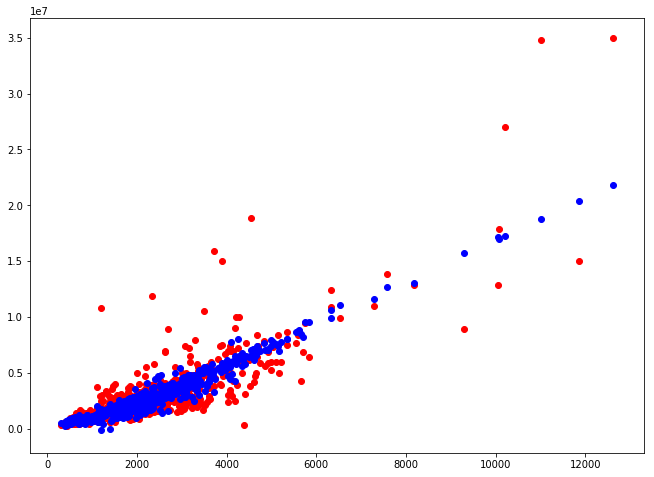

In [100]:
y_pred = model1b.predict(X_multi.values)
plt.figure(figsize=(11,8))
plt.scatter(X,y,color='red', linewidth=1)
plt.scatter(X, y_pred, color='blue', linewidth=1)

Hmmm Categorical data does not seem to add any improvements...
Although more variables does!  
We should engineer some features and see our results

# TODO: 
* ~~Scrape more data with more variables~~
* select features
* engineer features (dist to schools?, dist to city center?)
* Train a basic linear regressor
* Train a better model
* Train a neural network